In [37]:
%pip install pyagrum
%load_ext autoreload
%autoreload 2


import csv
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import re
import itertools
from model import *
from utils import *
from btg_generator import *
import re

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'a': 0, 'b': 0} = 0
{'a': 0, 'b': 1} = 0.8600000000000001
{'a': 1, 'b': 0} = 0.8600000000000001
{'a': 1, 'b': 1} = 0.8600000000000001
[+] 0.24
[+] 0.8600000000000001


## Import

{'r': 0, 's': 0} = 0
{'r': 0, 's': 1} = 0
{'r': 1, 's': 0} = 0
{'r': 1, 's': 1} = 0.5599999999999999

             ||  w                |
r     |s     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.0000  | 0.0000  |
1     |0     || 0.0000  | 0.0000  |
0     |1     || 0.0000  | 0.0000  |
1     |1     || 0.5600  | 0.5600  |



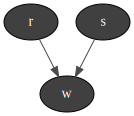

In [8]:
# bn=gum.fastBN("c->r->w<-s<-c")
bn=gum.fastBN("r->w<-s")


# bn.cpt("w")[{'r': 0, 's': 0}] = [1, 0]
# bn.cpt("w")[{'r': 0, 's': 1}] = [0.1, 0.9]
# bn.cpt("w")[{'r': 1, 's': 0}] = [0.1, 0.9]
# bn.cpt("w")[{'r': 1, 's': 1}] = [0.01, 0.99]
# bn.cpt("r")[{}] = [0.2, 0.8]
# bn.cpt("s")[{}] = [0.3, 0.7]

gu = GumUtils(bn)
# print(bn.cpt("c"))
# cpts = gu.generate_and_cpt("w")
# gu.set_cpt("w", cpts)
# for c in cpts:
#     print(c)

# print(bn.cpt("w"))


# print(gu.get_true_val("w"))
# print(gu.get_true_val("c"))

gnb.showBN(bn)


    





## Traverse

In [21]:
bn=gum.fastBN("c->r->w<-s<-d")
bn
# bn.cpt("c")[{}] = [0.2, 0.8]
# bn.cpt("d")[{}] = [0.4, 0.6]

def pow(a, b):
    if b == 1:
        return a
    else:
        return a * pow(a, b-1)

def cpt(gu, var_name):
    if gu.has_parents(var_name) == 0:
        return "Cpt of {}".format(var_name)
        # print(gu.diag.cpt(var_name))
    else:
        parents = gu.get_parents_names(var_name)
        for p in parents:
            cpt_str = cpt(gu, p)
            print(cpt_str)
            # print(gu.diag.cpt(p))

print_cpt(gu, "w")


Cpt of c
Cpt of r
Cpt of w
Cpt of d
Cpt of s
Cpt of w


## Ricorsion 

In [98]:
# bn=gum.loadID("btg.bifxml")
gu = GumUtils()
gu = btg_generate()

def cpt(gu, names):
    for var_name in names: 
        if not gu.has_parents(var_name):
            p("root node skip {}".format(var_name))
        # print(gu.diag.cpt(var_name))
        else:
            # print("{} has parents".format(var_name))
            parents = gu.get_parents_names(var_name)
            gum_node = gu.get_gum_node(var_name)
            cpt(gu, parents)
            if gum_node.is_and:
                gu.generate_and_cpt(var_name)
            elif gum_node.is_or:
                gu.generate_or_cpt(var_name)



leaf_nodes = GumNode.get_names(gu.get_leaf_nodes())
# print(leaf_nodes[0])
cpt(gu, [leaf_nodes[0]])
gnb.showBN(gu.diag)
# gu.diag

[+] Skipped 7-humanError(administrator)
[+] Skipped 8-hasMailAccount(administrator)
[+] Skipped 9-isSendingMail(administrator,administrator_mail)
[+] Skipped 15-isWeb('SQLi')
[+] Skipped 16-vulExists(company_website,'SQLi',information_disclosure)
[+] Skipped 22-hasPhysicalAccess(internal_attacker,daniel_workstation)
[+] Skipped 32-isPublic(elastic_search)
[+] Skipped 33-isAdminOf(administrator,elastic_search)
[+] Skipped 34-isDataStorage(elastic_search)
[+] Skipped 40-hasAccess(daniel,file_server,exec)
[+] Skipped 41-insiderness(daniel)
[+] Skipped 46-hasAccess(charlie,file_server,read)
[+] Skipped 47-unawareness(charlie)
[+] Skipped 48-hasMailAccount(charlie)
[+] Skipped 59-noWeb('SigRED')
[+] Skipped 60-vulExists(dns_server,'SigRED',code_exec)
[+] Set vertices
[+] Set arcs
[+] 55-tid02(_) cpt configured
[+] 21-tid03(_) cpt configured
[+] 3-tid17(_) cpt configured
[+] 31-tid01(_) cpt configured
[+] 58-tid05(_) cpt configured
[+] 39-tid04(_) cpt configured
[+] 6-tid06(_) cpt configured

# Filled btg

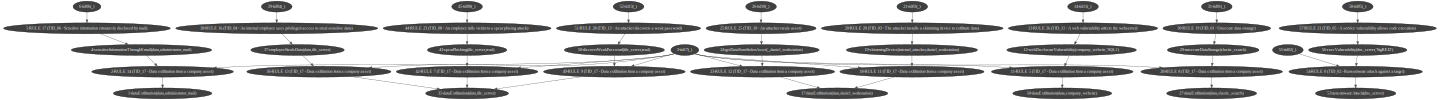

In [100]:
bn = gum.loadBN("filled_btg.bifxml")
gnb.showBN(bn, size=20)
gnb.showCPTs(bn)